This notebook runs a version of Blip that has been fine tuned on a dataset of cityscapes.


In [1]:
# install Hugging Face transformers library to access pretrained models &
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-180s1pwf
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-180s1pwf
  Resolved https://github.com/huggingface/transformers.git to commit 050e0b44f6a63131b56d493543ab39fb7b4f20ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.37.0.dev0-py3-none-any.whl size=8269458 sha256=cde84ed53c82756ef04c95e9aa921b331c3c6b26ef7e9989217b8c83adfd880b
  Stored in directory: /tmp/pip-ephem-wheel-cache-fyrz1d_y/wheels/cf/59/82/6492402e887a68975030bf8c06532260abc16abb7ccd8127cc
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# imports
from transformers import AutoModel, AutoProcessor, BlipForConditionalGeneration
from matplotlib import pyplot as plt
from PIL import Image  # lib for working with / converting images
import requests  # get images from URLs

`AnnotionFormat` is deprecated and will be removed in v4.38. Please use `transformers.image_utils.AnnotationFormat` instead.


In [4]:
# import the fine tuned model, stored on Google Drive

path_to_model = "/content/drive/MyDrive/Colab Notebooks/BC-Project4/model_3"
model = BlipForConditionalGeneration.from_pretrained(path_to_model)

In [5]:
# define the processor
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [8]:
# print the image with the caption
def get_caption(image, repetition_penalty=1):
  inputs = processor(images=image, return_tensors='pt')
  pixel_values = inputs.pixel_values

  # repetition_penalty of 1 means no penalty
  generated_ids = model.generate(pixel_values=pixel_values, max_length=50, repetition_penalty=repetition_penalty)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

  print(generated_caption)

  fig = plt.figure(figsize=(18, 14))
  plt.imshow(image)
  plt.title(generated_caption)
  plt.axis('off')
  plt.show()

In [9]:
# test with image not in the dataset, from URL

# image of New York (Manhattan)
new_image_url = "https://images.unsplash.com/photo-1532960401447-7dd05bef20b0?q=80&w=3140&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

Output hidden; open in https://colab.research.google.com to view.

st. louis skyline and eads bridge at dusk


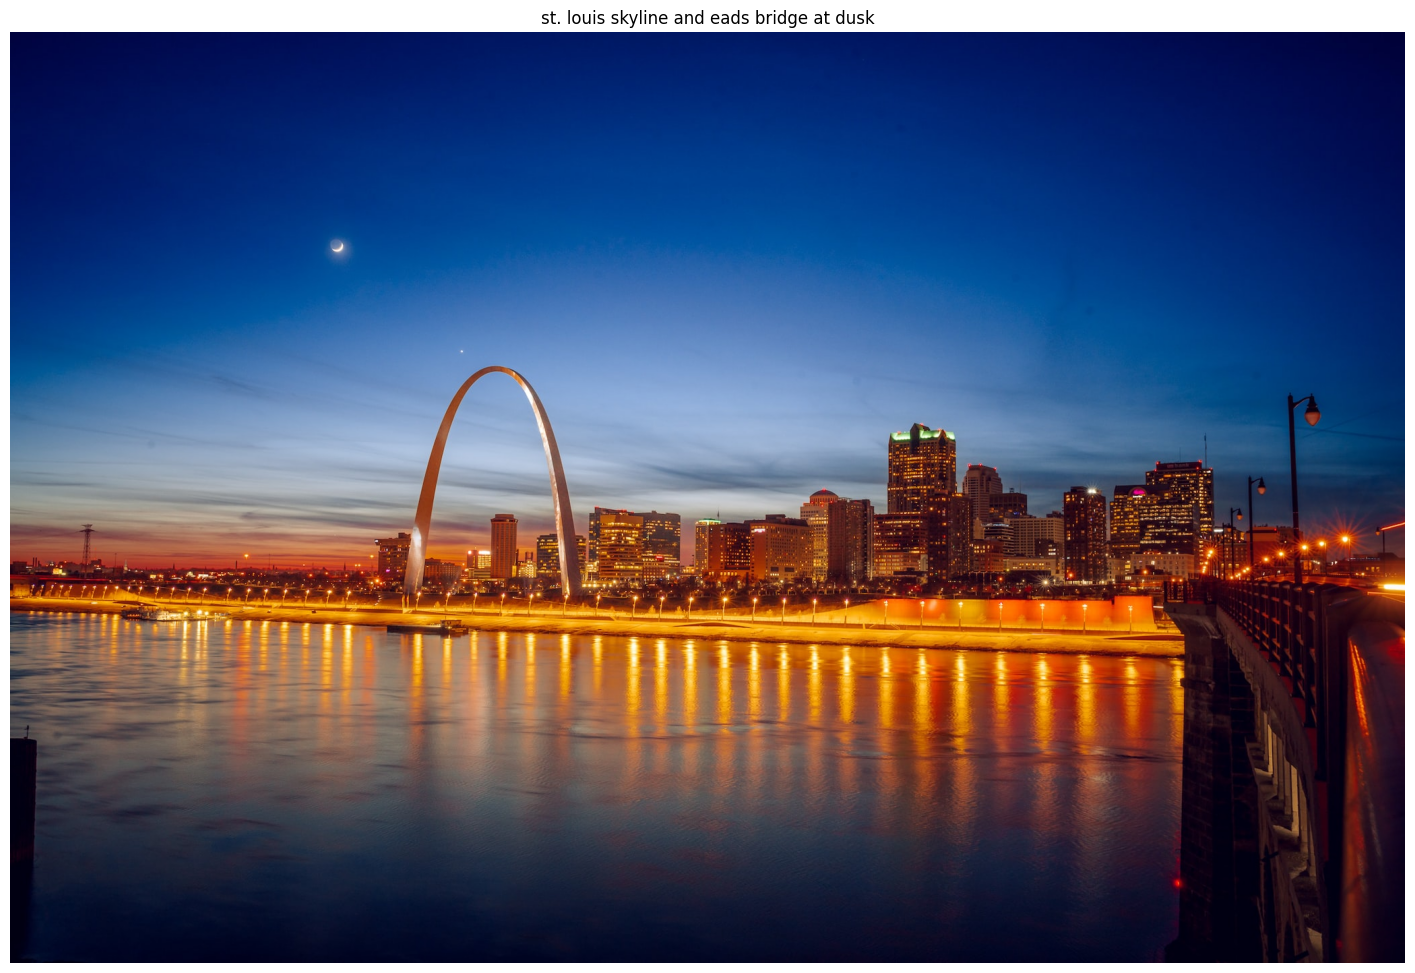

In [10]:
# test with image not in the dataset, from URL

# image of St. Louis
new_image_url = "https://images.unsplash.com/photo-1675906798393-89cbae461520?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

In [11]:
# test with image not in the dataset, from URL

# image of Tokyo
new_image_url = "https://images.unsplash.com/photo-1513407030348-c983a97b98d8?q=80&w=1172&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

Output hidden; open in https://colab.research.google.com to view.

## Test Images for Comparison with Un-Tuned Model

In [12]:
# test with image not in the dataset, from URL

# image of Philadelphia
new_image_url = "https://images.unsplash.com/photo-1616528279874-b3d3b50ab6c7?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# test with image not in the dataset, from URL

# image of Pittsburgh - does it identify the rivers and bridges?
new_image_url = "https://images.unsplash.com/photo-1555424221-250de2a343ad?q=80&w=2062&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

Output hidden; open in https://colab.research.google.com to view.

view of the skyline of buenos aires on a sunset day


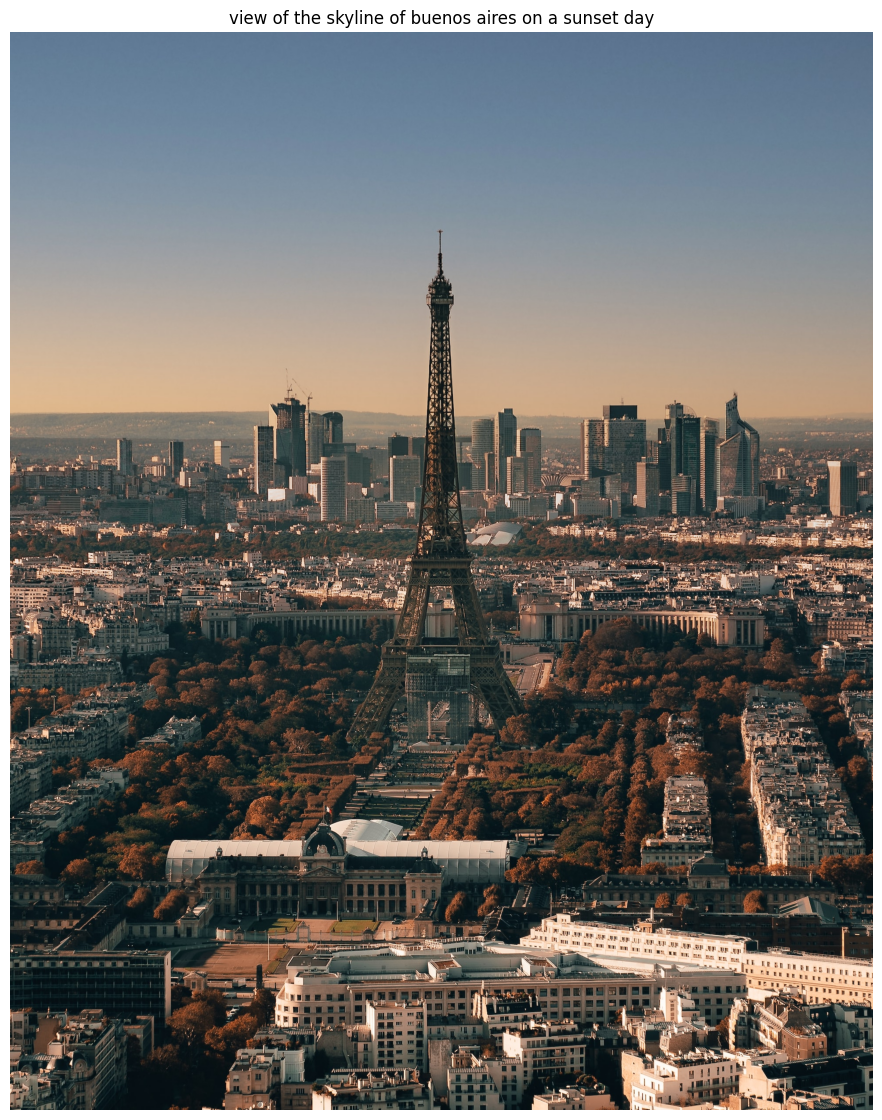

In [14]:
# test with image not in the dataset, from URL

# image of Paris - it should identify the Eiffel Tower
new_image_url = "https://images.unsplash.com/photo-1637329096986-62486d0c4380?q=80&w=1964&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

In [15]:
# test with image not in the dataset, from URL

# image of Cologne - how does the model do with lesser known landmarks?
new_image_url = "https://images.unsplash.com/photo-1561624485-0e43bcc1836d?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

Output hidden; open in https://colab.research.google.com to view.

night city lights beijing international trade center cbd urban buildings skyline in black and white


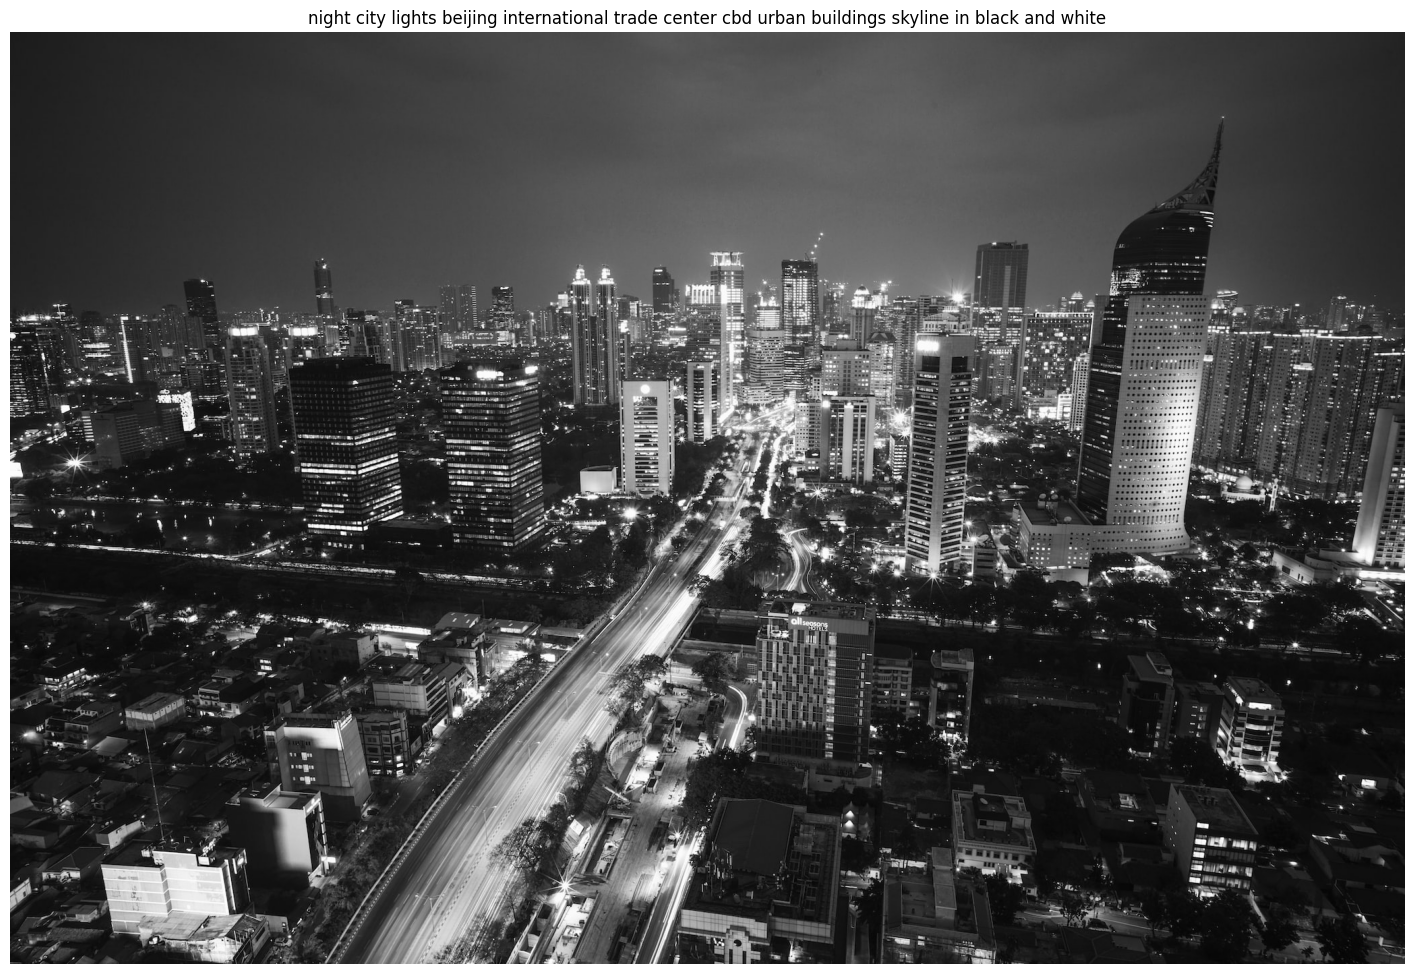

In [16]:
# test with image not in the dataset, from URL

# image of Jakarta, Indonesia (black and white)
new_image_url = "https://images.unsplash.com/photo-1446052377488-d40ee7263458?q=80&w=2069&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

kuala lumpur skyline at sunrise


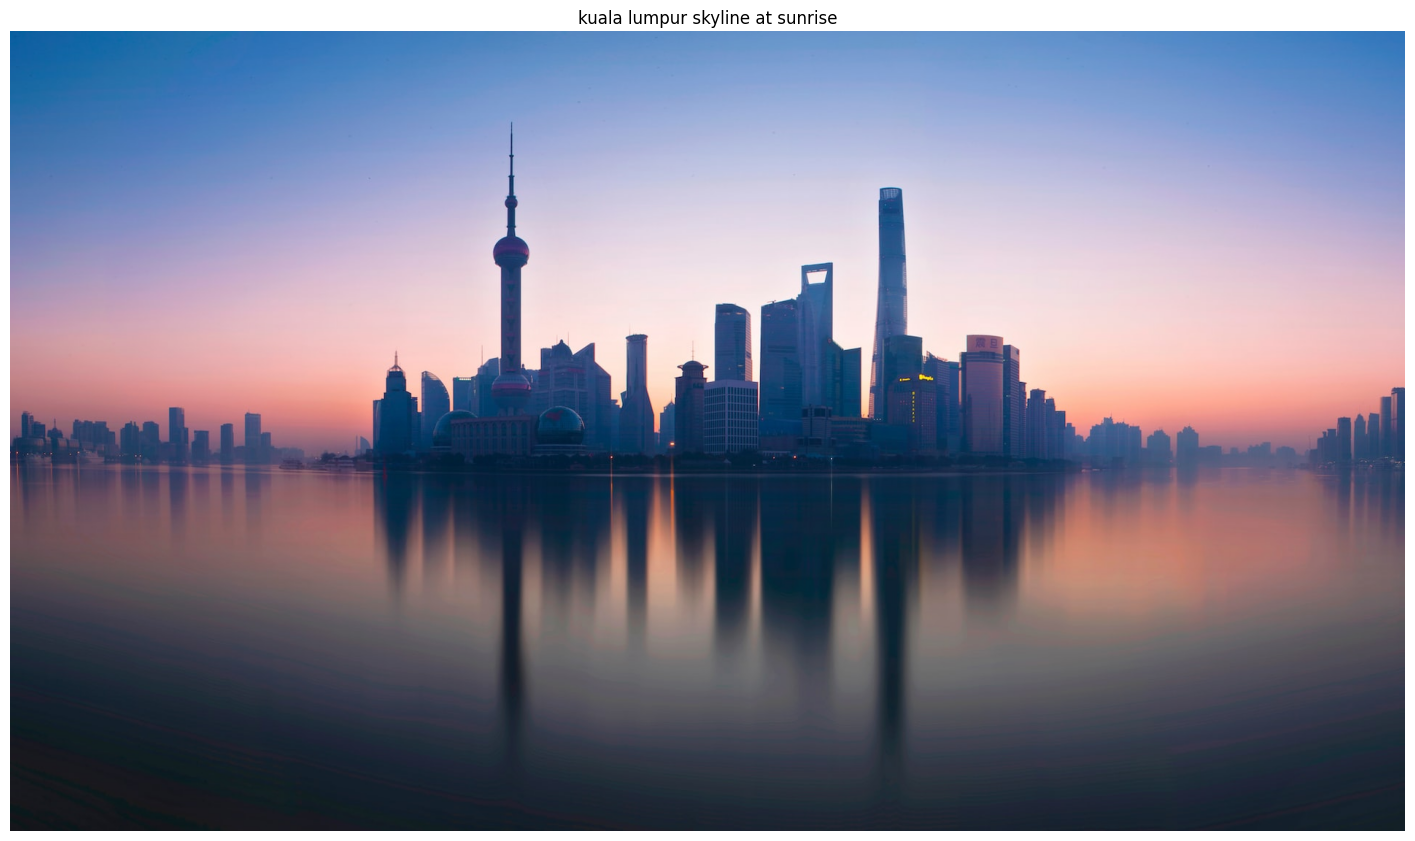

In [17]:
# test with image not in the dataset, from URL

# image of Shanghai (reflection)
new_image_url = "https://images.unsplash.com/photo-1545893835-abaa50cbe628?q=80&w=1912&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

macao international fireworks display contest sea area in front of the macau tower


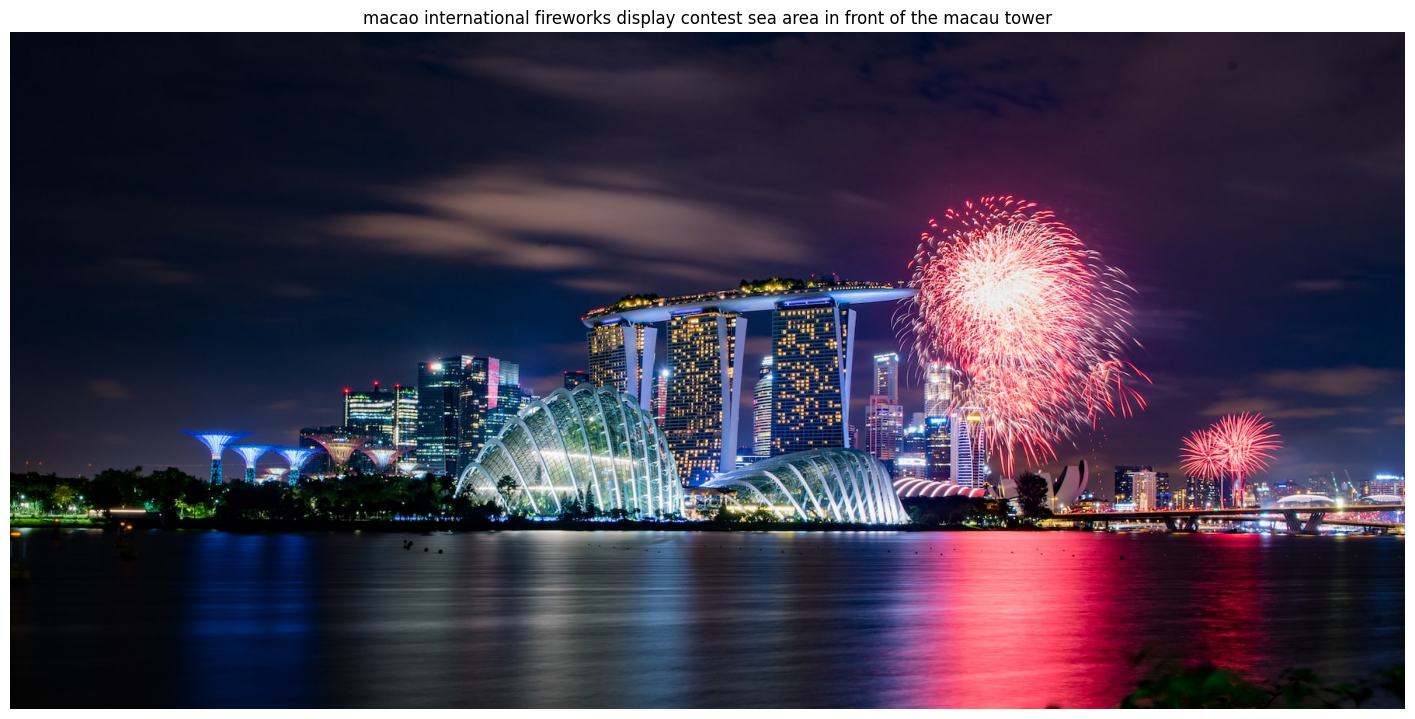

In [18]:
# test with image not in the dataset, from URL

# image of Singapore (fireworks)
new_image_url = "https://images.unsplash.com/photo-1530423316264-2b8b006f7d63?q=80&w=1796&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

downtown vancouver skyline and english bay, canada


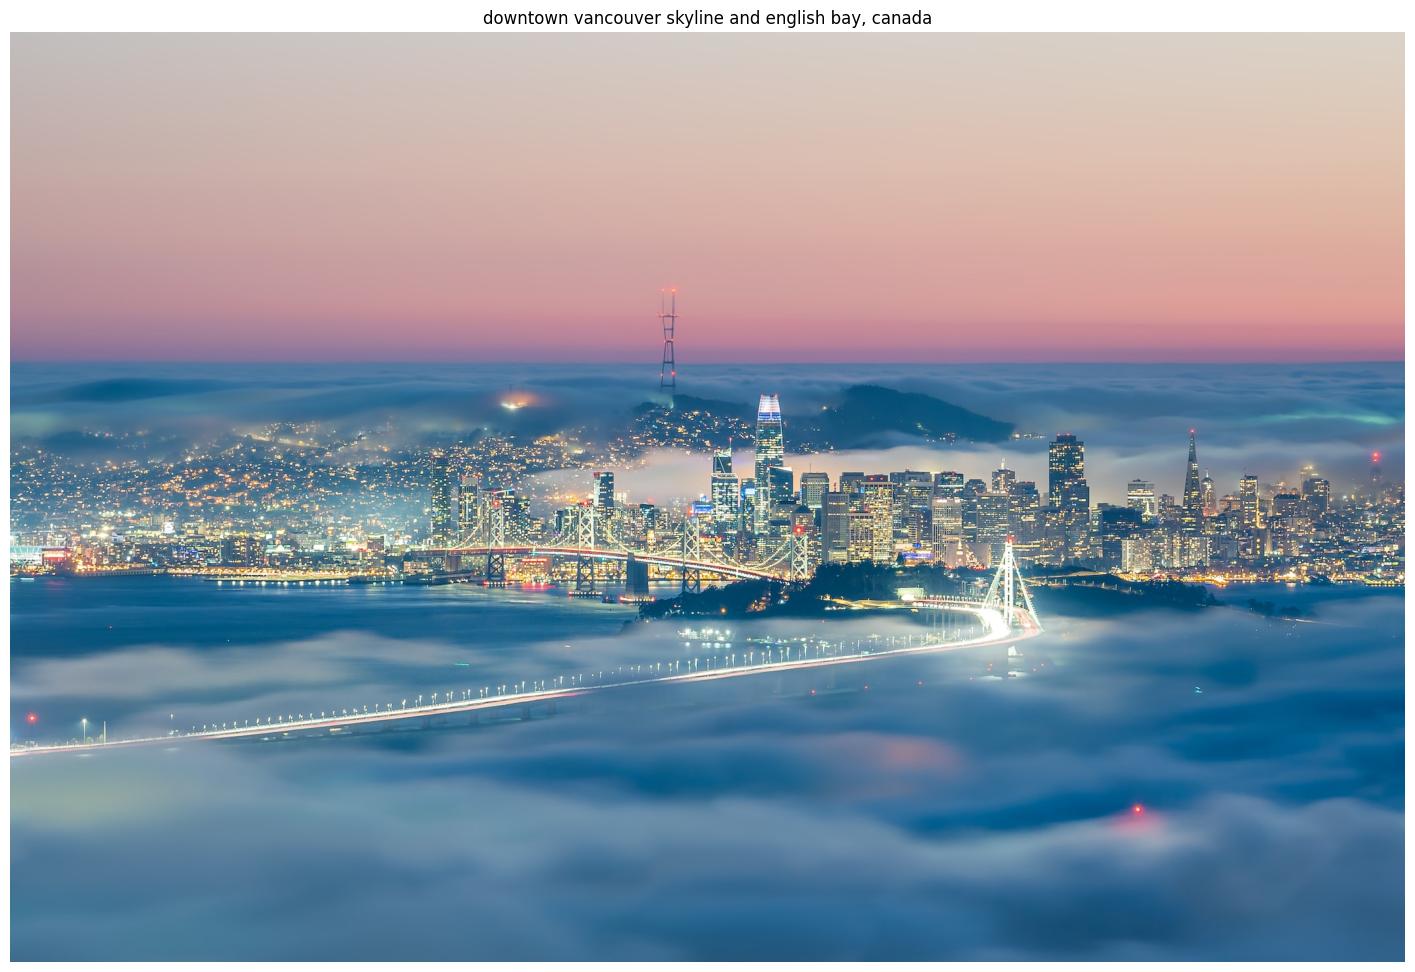

In [19]:
# test with image not in the dataset, from URL

# image of San Francisco (fog)
new_image_url = "https://images.unsplash.com/photo-1683695948101-fd31df8697b5?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

new_image = Image.open(requests.get(new_image_url, stream=True).raw).convert('RGB')
get_caption(new_image, 1.01)

#### **Credits**

Images in this project were obtained from Adobe Stock through an Education License and may not be repurposed by third parties. The Education License permits faculty members and staff members to use, reproduce, archive, modify, and display the asset: for advertising, marketing, promotional, and decoration purposes related solely to the Enterprise, for professional and academic activities related solely to the Enterprise, and not for any other commercial purpose. Students may use, reproduce, archive, modify, and display the asset in all media, solely in connection with course work at the Enterprise, and not for any other commercial or paid purposes. The use of these licensed images is therefore intended for the contributors to this educational project, as part of the edX bootcamp in collaboration with the University of Pennsylvania, and may not be used in other ways.